## Problem Statement:
**The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.**



###### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Attribute Information


**Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict.**


Name / Data Type / Measurement Unit / Description

--------------------------------------------------------------------------
Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years.

------------------------------------------------------------------------------

**You have to predict the rings of each abalone which will lead us to the age of that abalone.**

# This is Regression problem bcz we have to predict Rings columns which is integer Type . . .

# ----------------------------------------------------------------------------------------------

# Now Lets load The dataset and Explore

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('abalone.csv')

In [3]:
df.shape

(4177, 9)

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [7]:
df.sample(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
787,M,0.495,0.385,0.135,0.7090,0.2110,0.1375,0.2620,12
3759,M,0.530,0.425,0.155,0.7905,0.3070,0.1710,0.2595,9
4014,M,0.625,0.480,0.175,1.0650,0.4865,0.2590,0.2850,10


In [8]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [9]:
print("Rows, columns: " + str(df.shape))

Rows, columns: (4177, 9)


# NOW LETS CHECK THE NULL VALUES IN THE COLUMNS

In [10]:
df.isnull()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


**soo here the output is representing in booleans type and here we have 4177 rows and 9 columns which is a large data and we not able to see the complete rows here ,so we will go for next step**.

In [11]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

**So here we have No Null Values in all the columns**

##### Lets Show it on the Heatmap 

<AxesSubplot:>

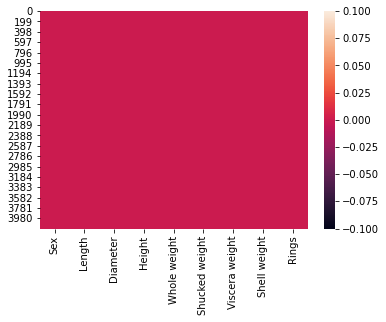

In [12]:
sns.heatmap(df.isnull())

**No Null Values in any of the column**

# EDA

### NOW LETS DO UNIVARIATE ANALYSIS

In [13]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

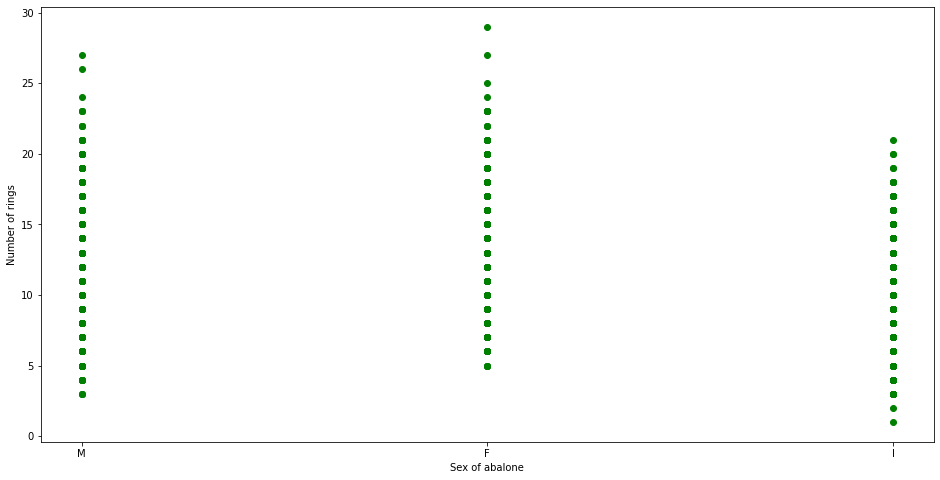

In [14]:
plt.figure(figsize=(16,8))
plt.scatter(df['Sex'],df['Rings'],c='green')
plt.xlabel('Sex of abalone')
plt.ylabel('Number of rings')
plt.show()

**In Male the ring starts from 3 to 27**

**In Female the ring starts from 5 to 29**

**In Infant the ring starts from 3 to 21**

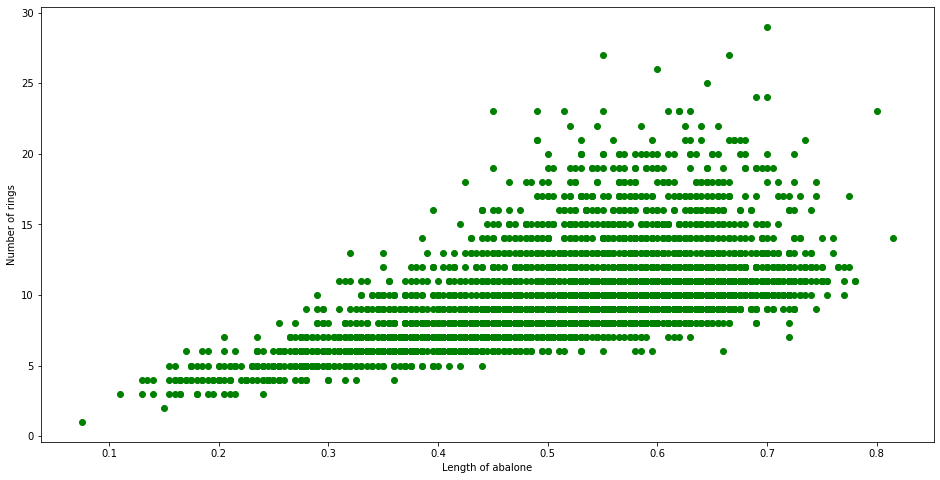

In [15]:
plt.figure(figsize=(16,8))
plt.scatter(df['Length'],df['Rings'],c='green')
plt.xlabel('Length of abalone')
plt.ylabel('Number of rings')
plt.show()

**We can see that as the Length increases the number of Rings also increases,so lenght and ring have positive relationship**

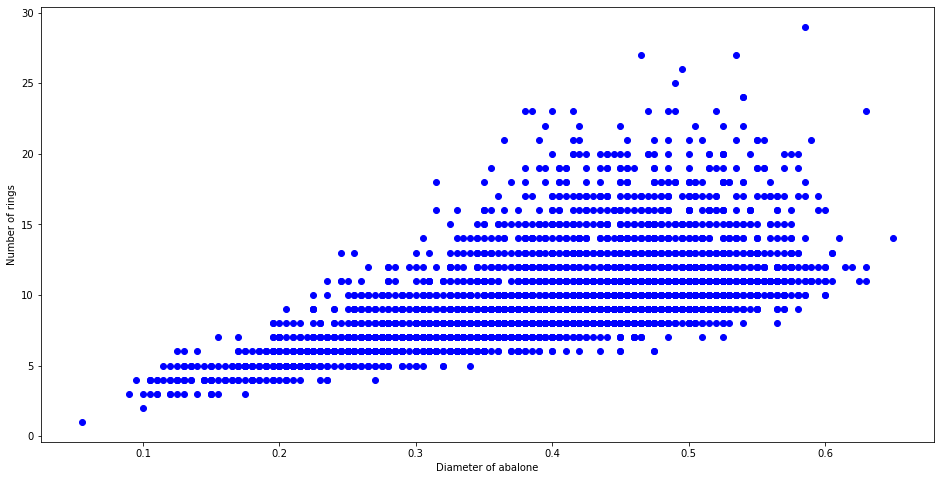

In [16]:
plt.figure(figsize=(16,8))
plt.scatter(df['Diameter'],df['Rings'],c='blue')
plt.xlabel('Diameter of abalone')
plt.ylabel('Number of rings')
plt.show()

**It showes the positive relationship with The number rings  ...As the Diameter increases the Number of ring also increases**

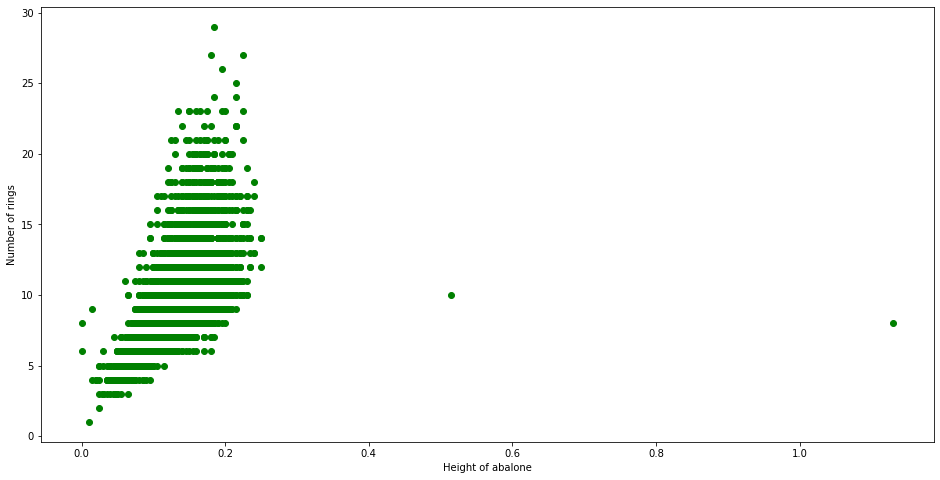

In [17]:
plt.figure(figsize=(16,8))
plt.scatter(df['Height'],df['Rings'],c='green')
plt.xlabel('Height of abalone')
plt.ylabel('Number of rings')
plt.show()

**we can see that the Height of abalone is mainly scattered between 0.0 to 0.3 ,and the Rings is scattered between 0 to 0.25 mainly ,so we can assume that the average height of ablone is 0.0 to 0.3**

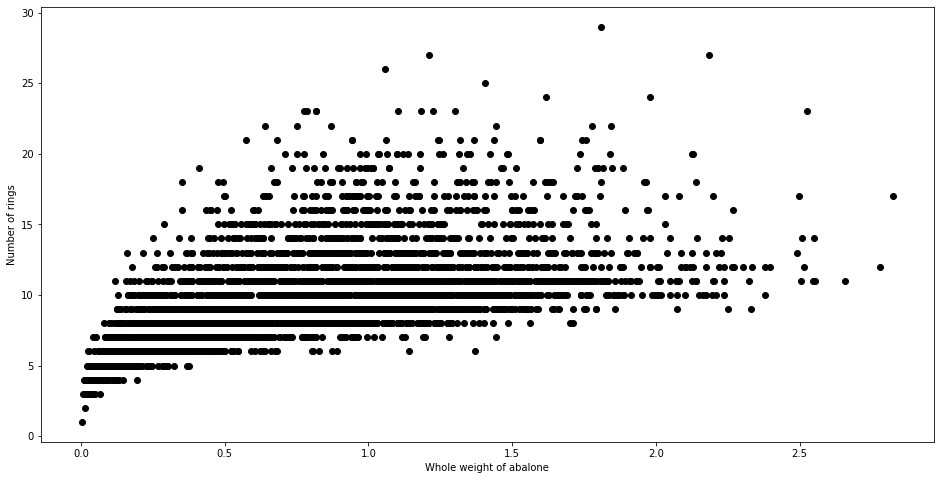

In [18]:
plt.figure(figsize=(16,8))
plt.scatter(df['Whole weight'],df['Rings'],c='black')
plt.xlabel('Whole weight of abalone')
plt.ylabel('Number of rings')
plt.show()

**So here we can see that as the whole weight of abalone is increasing the Number of rings in abalone is also increasing .Whole weight is distributed between 0 to 2.3 and till 0 to 25 number of rings.**

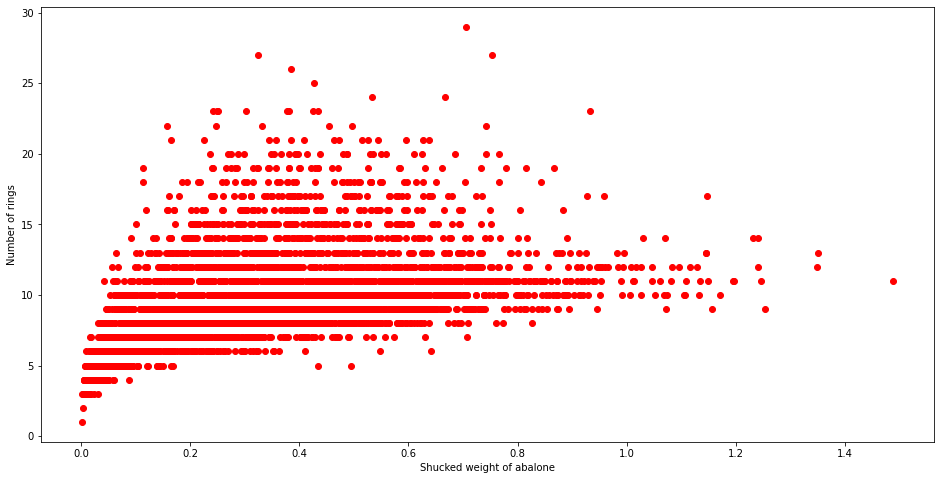

In [19]:
plt.figure(figsize=(16,8))
plt.scatter(df['Shucked weight'],df['Rings'],c='red')
plt.xlabel('Shucked weight of abalone')
plt.ylabel('Number of rings')
plt.show()

**WE can see that the Shucked weight or Weight of meat is distributed mainly between 0 to 1.1 and till 0 to 24 number of rings**

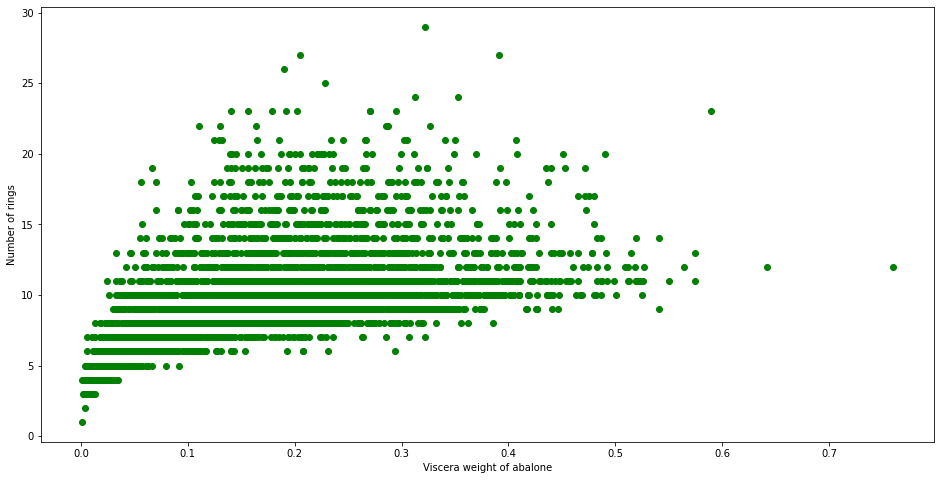

In [20]:
plt.figure(figsize=(16,8))
plt.scatter(df['Viscera weight'],df['Rings'],c='green')
plt.xlabel('Viscera weight of abalone')
plt.ylabel('Number of rings')
plt.show()

**WE can see that the Viscera weight or gut weight (after bleeding) is distributed mainly between 0 to 0.5 and till 0 to 24 number of rings**

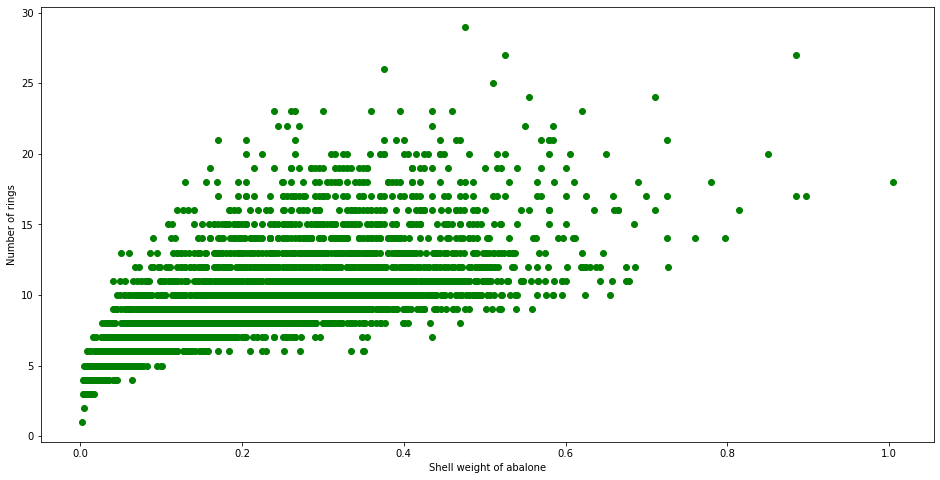

In [21]:
plt.figure(figsize=(16,8))
plt.scatter(df['Shell weight'],df['Rings'],c='green')
plt.xlabel('Shell weight of abalone')
plt.ylabel('Number of rings')
plt.show()

**WE can see that the shell weight or abalone weight after being dried is distributed mainly between 0 to 0.7 and till 0 to 24 number of rings**

========================

### This is a new plotting style that i have learned Online 

In [22]:
from mpl_toolkits.mplot3d import Axes3D

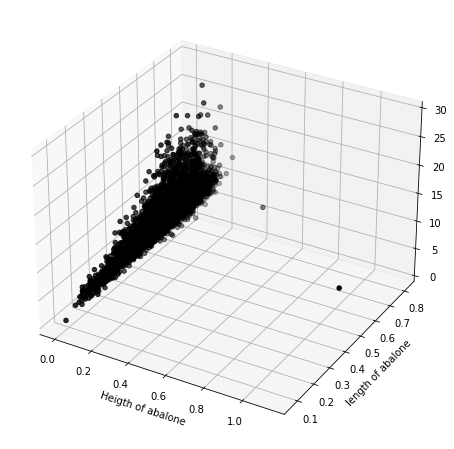

In [23]:
fig=plt.figure(figsize=(16,8))
aa=plt.axes(projection='3d')

aa.set_xlabel('Heigth of abalone')
aa.set_ylabel('length of abalone')
aa.scatter3D(df['Height'],df['Length'],df['Rings'],c='black')

plt.show()

**the 2 dow present outside is the Outliers** 

------------------------------------

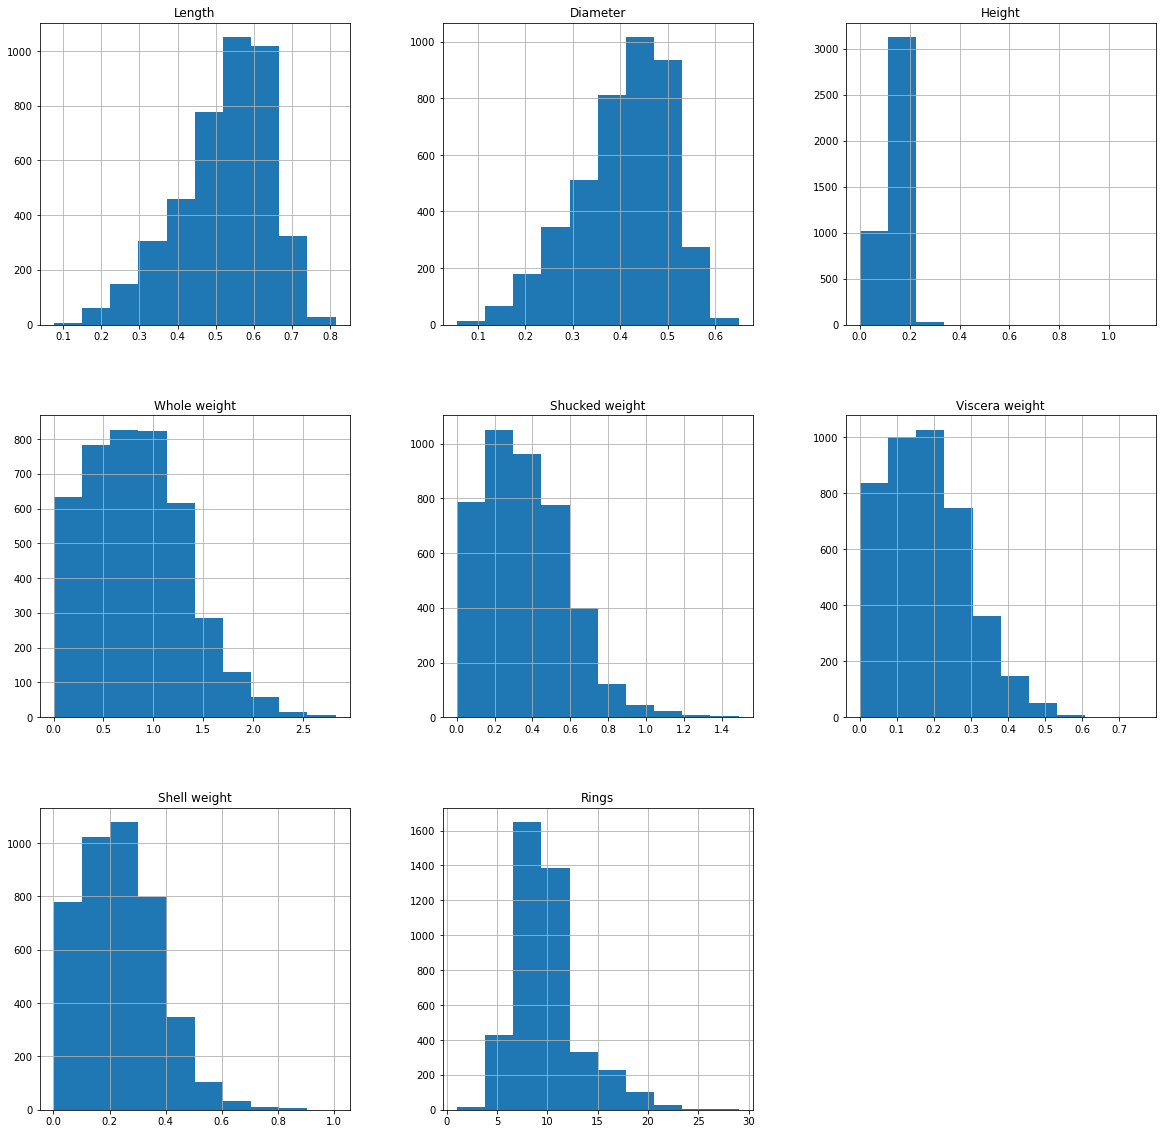

In [24]:
df.hist(bins=10, figsize=(20,20))
plt.show()

**WE can see the datas are skewed alot and need to be treated**

<Figure size 1800x2160 with 0 Axes>

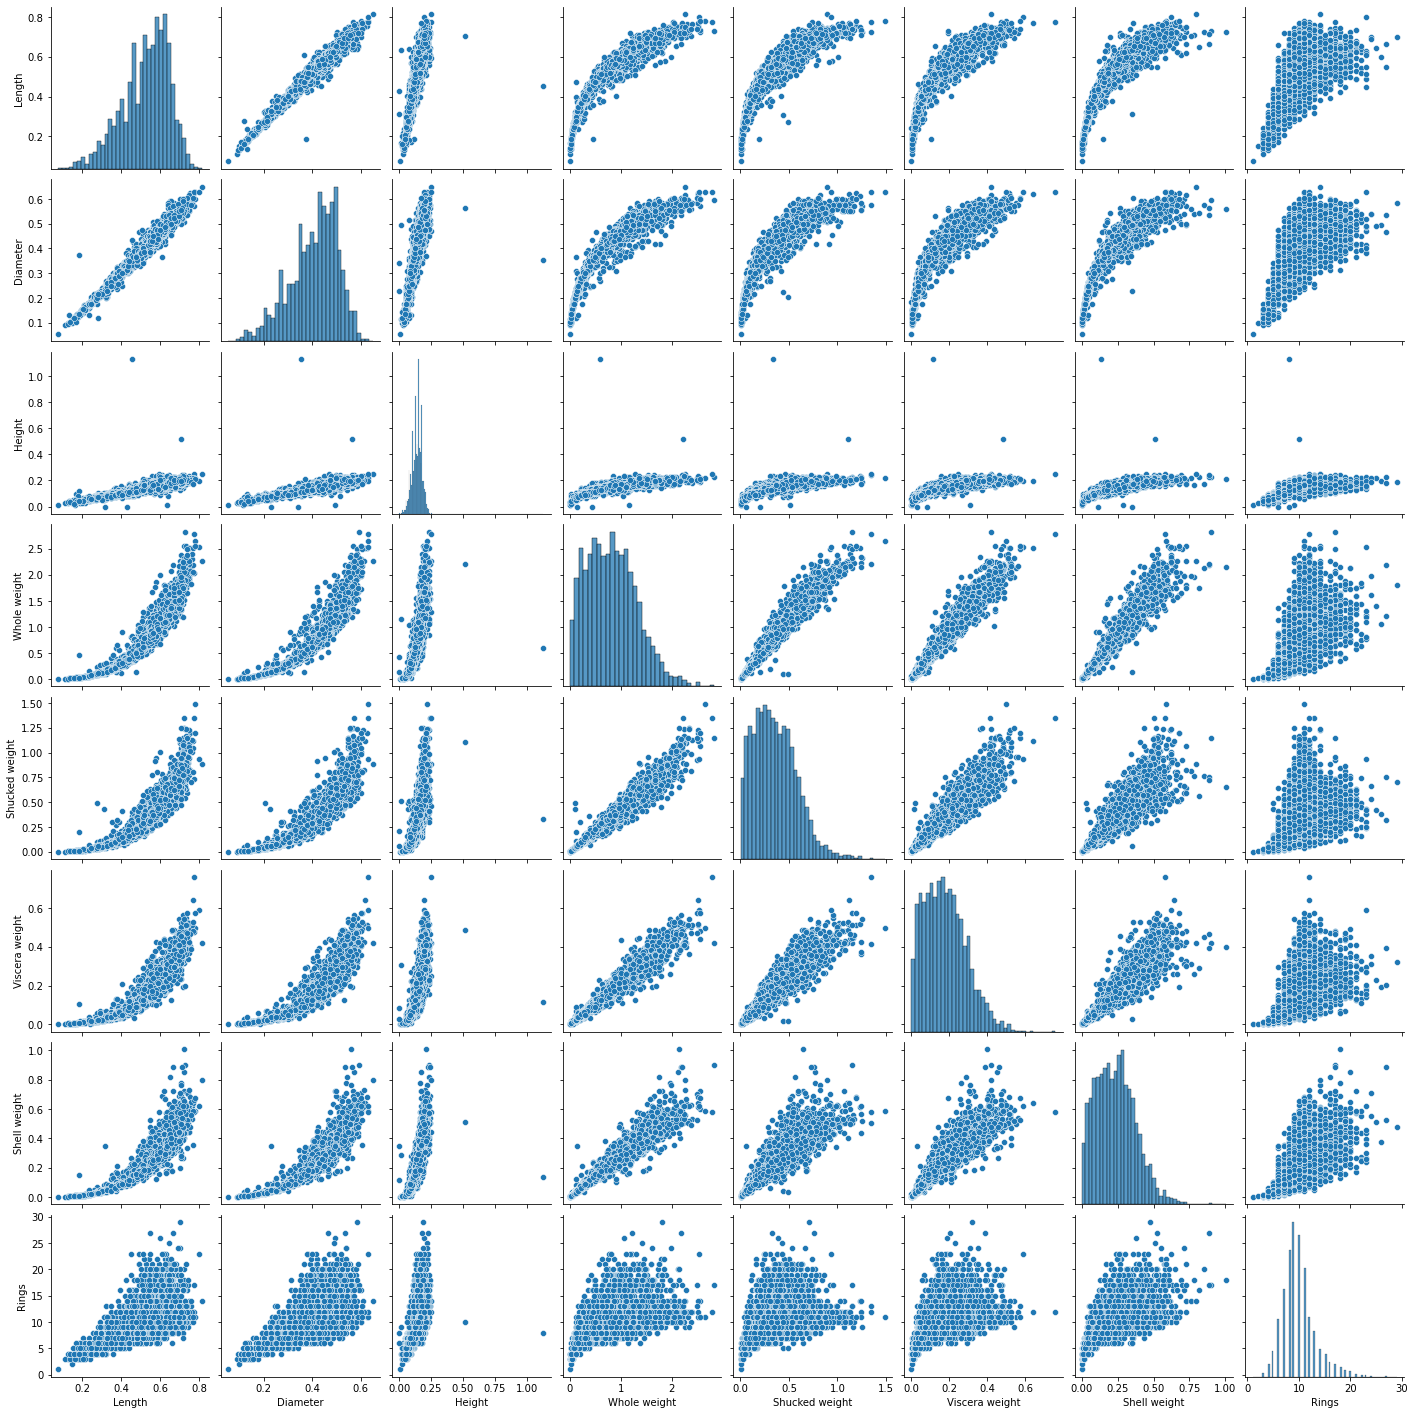

In [25]:
# Lets plot eerything all together

plt.figure(figsize=(25,30))

sns.pairplot(df)

plt.show()

--------------------------------------------

# CORRELATIONS

In [26]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [27]:
df.corr()['Rings'].sort_values()

Shucked weight    0.420884
Viscera weight    0.503819
Whole weight      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

**Here We can see that all the columns are important and none of the columns is having any Negative relationship with the taget variable.. and here we have a chances of multicollinearity**

<AxesSubplot:>

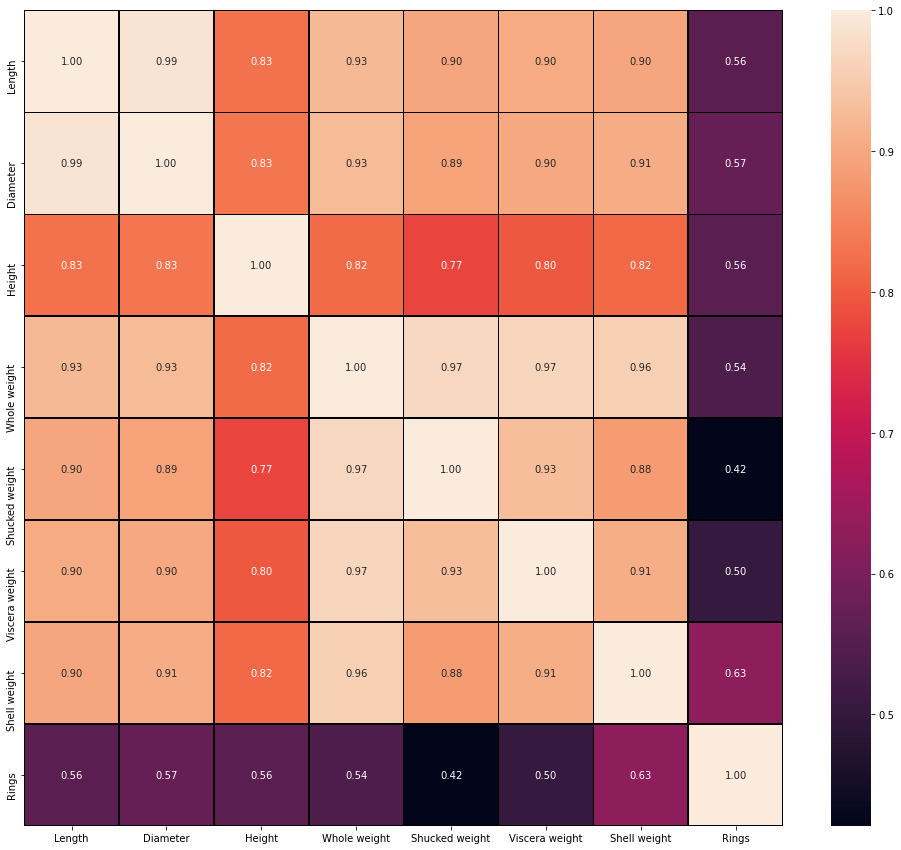

In [28]:
plt.figure(figsize=(17,15))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

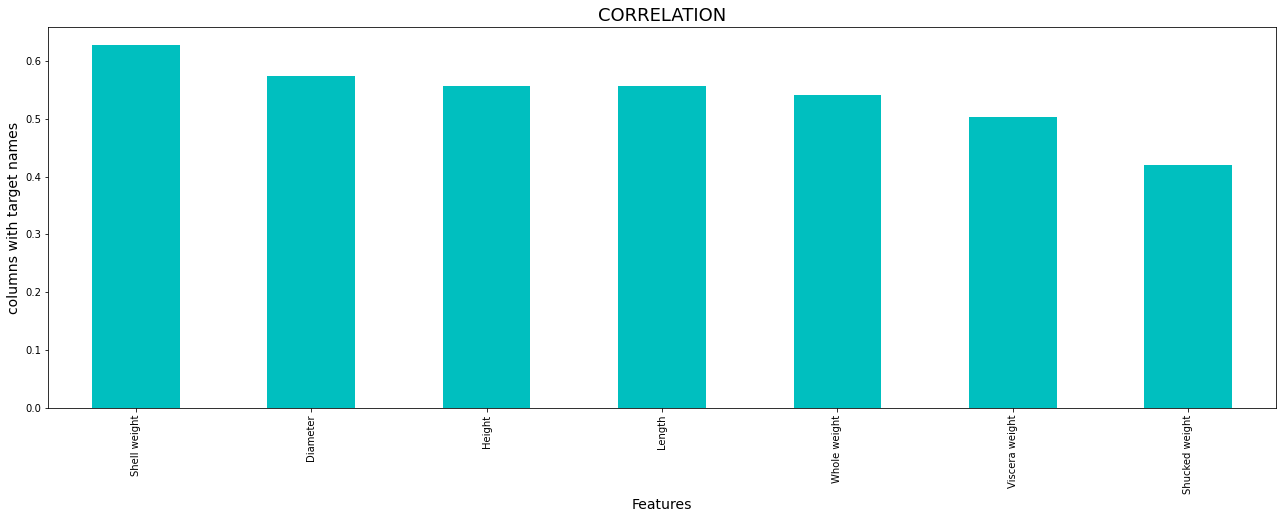

In [29]:
#checking the columns which are positively and negatively correlated

plt.figure(figsize=(22,7))
df.corr()['Rings'].sort_values(ascending=False).drop(['Rings']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('CORRELATION',fontsize=18)
plt.show()

**All are having Positive relationship and all seems to be same by graph so there may be a case of multicollinearity**

# DESCRIPTIVE STATISTICS

In [30]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<AxesSubplot:>

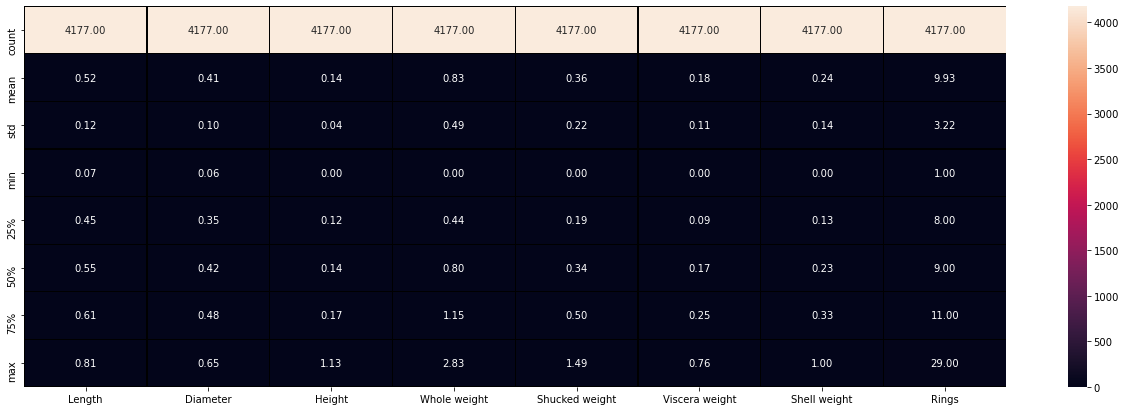

In [31]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

### Outcome of describe() of dataset :-

**from the above plotting we are determining mean,standard deviation,minimum and maximum value of each column**

-----------------------------------------------------
**Total number rows and column in dataset**

1. Rows :- 4177
2. columns :- 9

-----------------------------------------------------------------

**LENGTH**

Mean    :- 0.52

std     :- 0.12

minimum :- 0.07

Maximum :- 0.81

-------------------------------------

**DIAMETER**


Mean    :- 0.41

std     :- 0.10

minimum :- 0.06

Maximum :- 0.65

---------------------------------------

**HEIGHT**

Mean    :- 0.14

std     :- 0.04

minimum :- 0.00

Maximum :- 1.13

---------------------------------------

**WHOLE WEIGHT**

Mean    :- 0.83

std     :- 0.49

minimum :- 0.00

Maximum :- 2.83

----------------------------------------

**SHUCKED WEIGHT**

Mean    :- 0.36

std     :- 0.22

minimum :- 0.00

Maximum :- 1.49

-------------------------------------------

**VISCERA WEIGHT*

Mean    :- 0.18

std     :- 0.11

minimum :- 0.00

Maximum :- 0.76

--------------------------------------------

**SHELL WEIGHT**

Mean    :- 0.24

std     :- 0.14

minimum :- 0.00

Maximum :- 1.00

---------------------------------------------

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


## Converting object column(sex) into integer

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

In [35]:
df['Sex'].dtype

dtype('int32')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int32  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int32(1), int64(1)
memory usage: 277.5 KB


In [37]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [38]:
df['Sex'].unique()

array([2, 0, 1])

# # OUTLIERS CHECKING

In [39]:
# here we will make the variable where we will give some values

colmlist=df.columns.values
ncol=30
nrows=14

In [40]:
colmlist

array(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'],
      dtype=object)

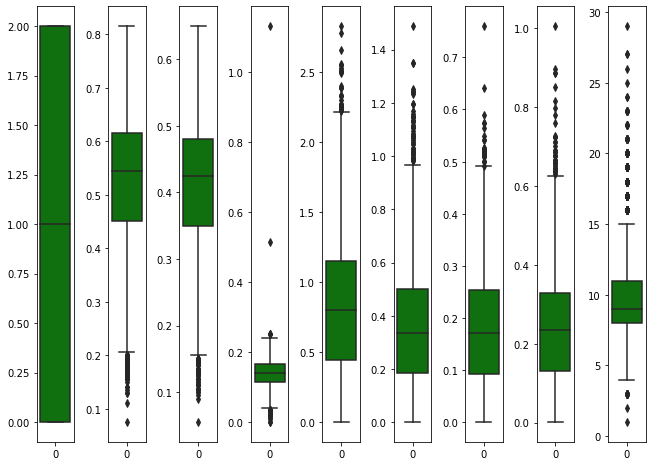

In [41]:
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(colmlist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data= df[colmlist[i]],color='green',orient='v')
    plt.tight_layout()

**We can see that lot of Outliers are present in the columns expect Sex column ,we will correct this**

# SKEWNESS

In [42]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

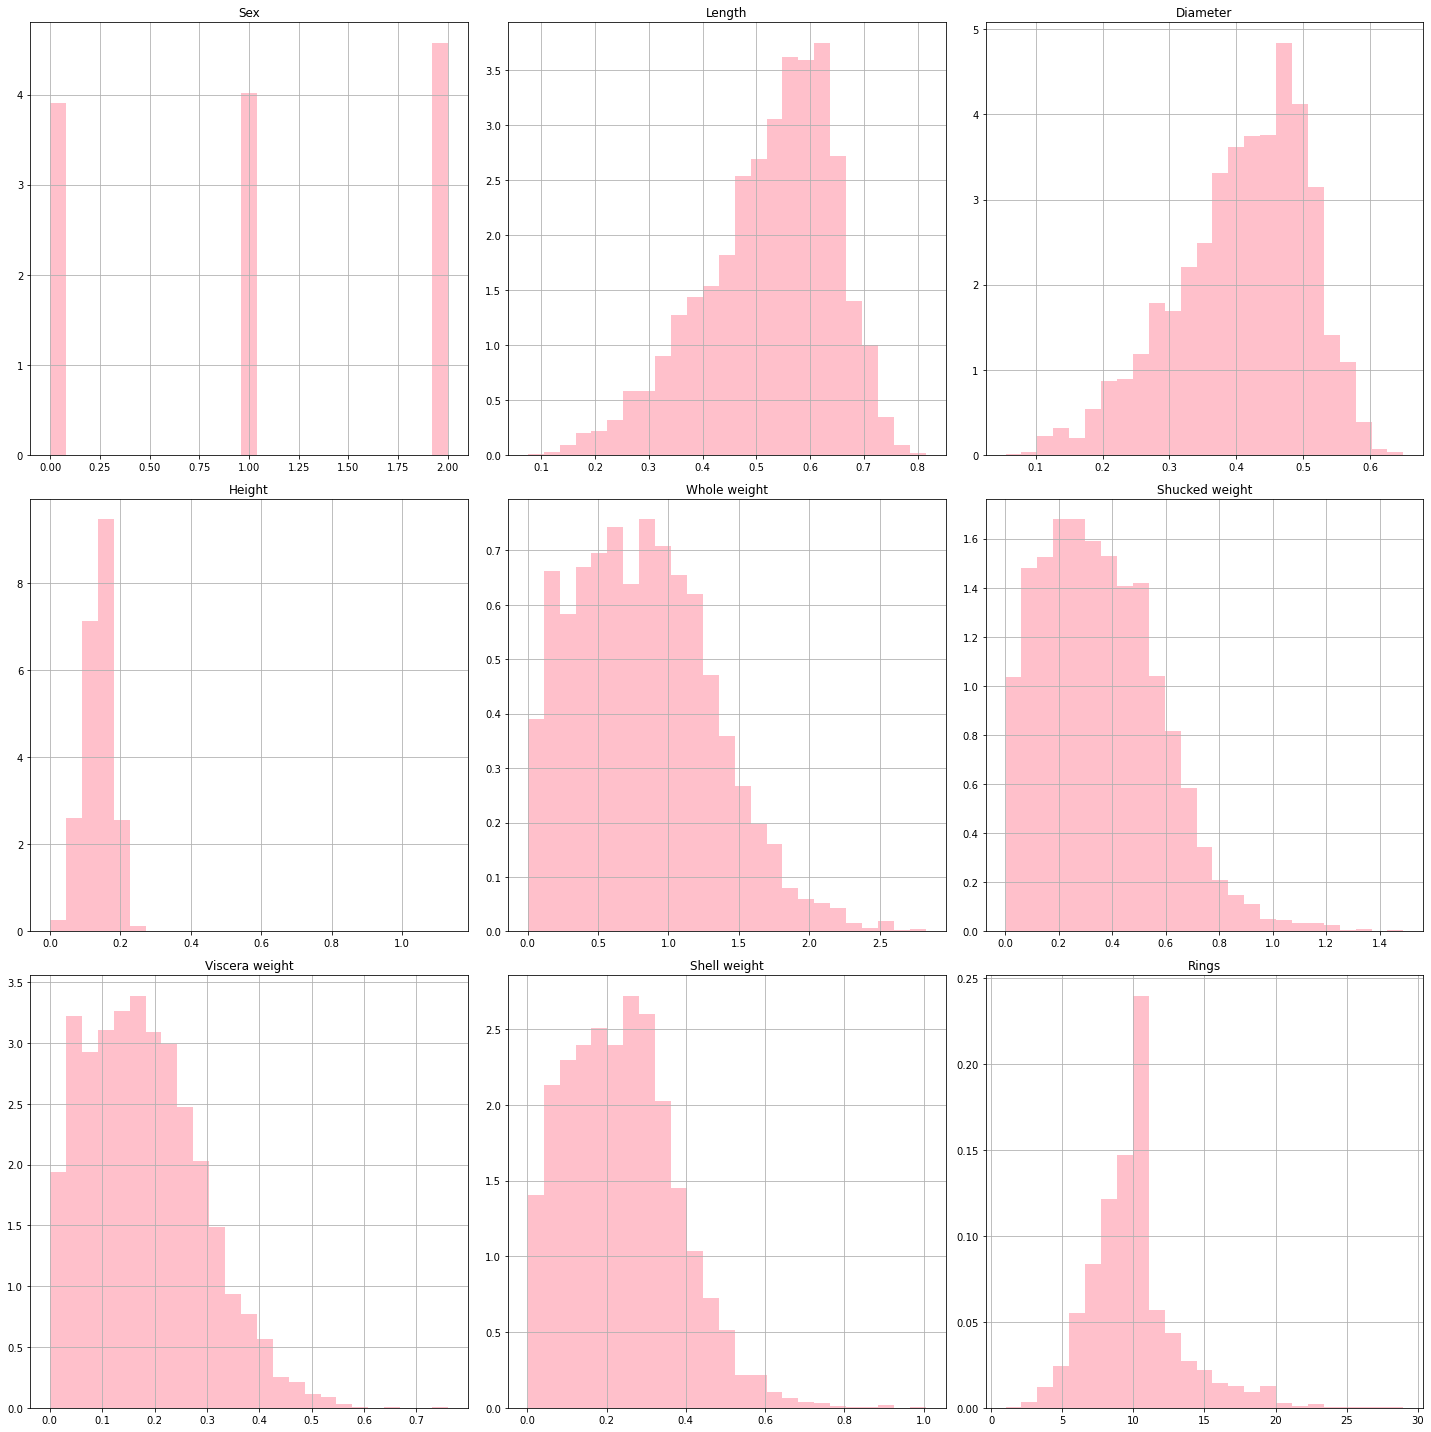

In [43]:
#Lets plot all using Histogram and see the skewness again
 
plt.rcParams['figure.figsize']=(20,20)
df.hist(bins=25,color='pink',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

**We can see lot of skewness in the columns**

<AxesSubplot:xlabel='Length', ylabel='Density'>

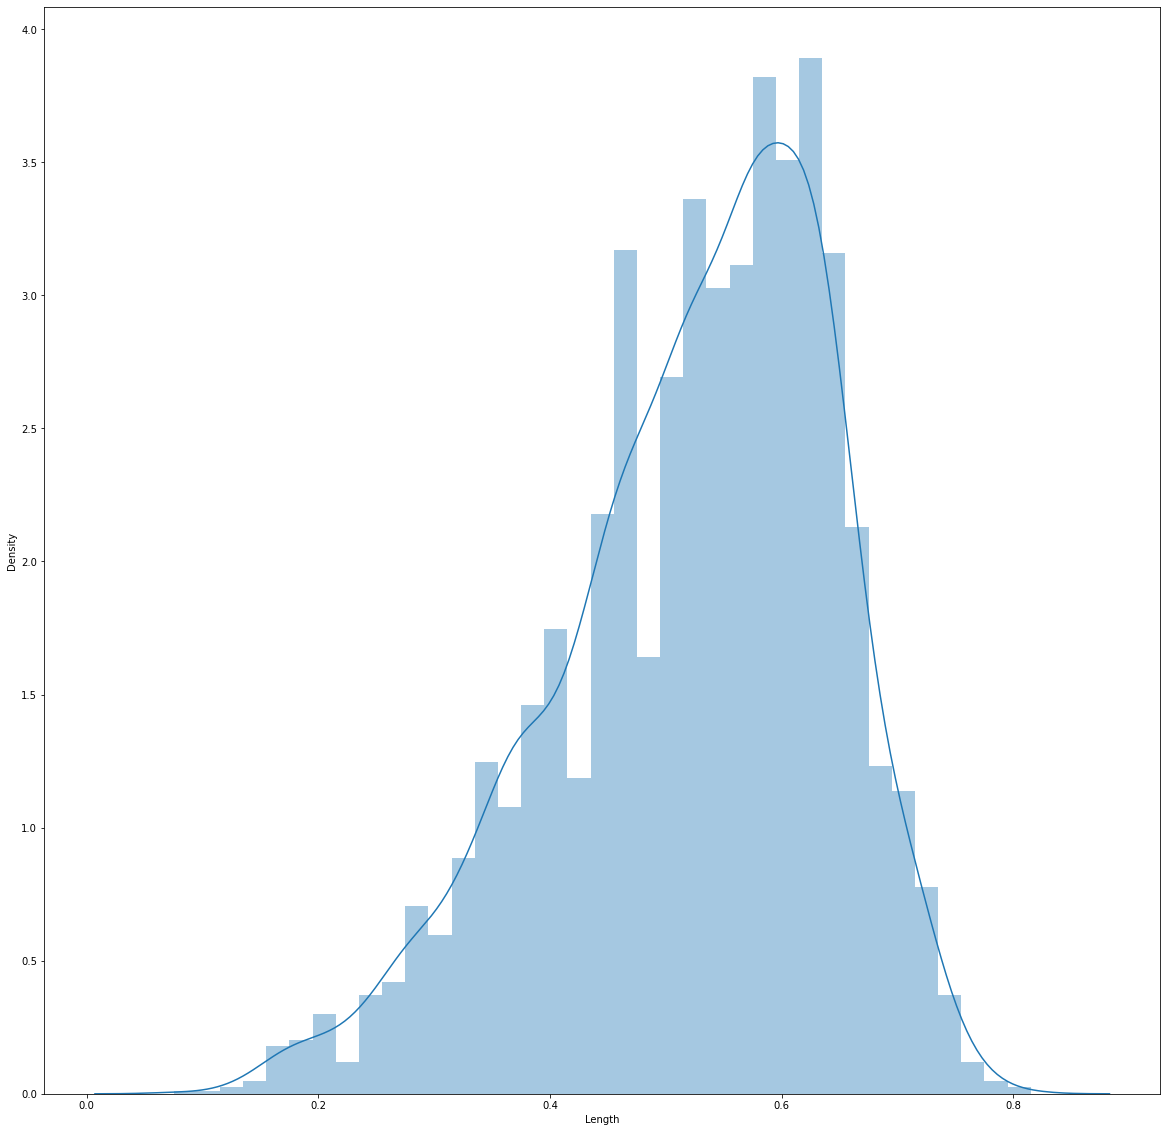

In [44]:
sns.distplot(df['Length'])

It is skewed left side,building block is out of the normalized  curve

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

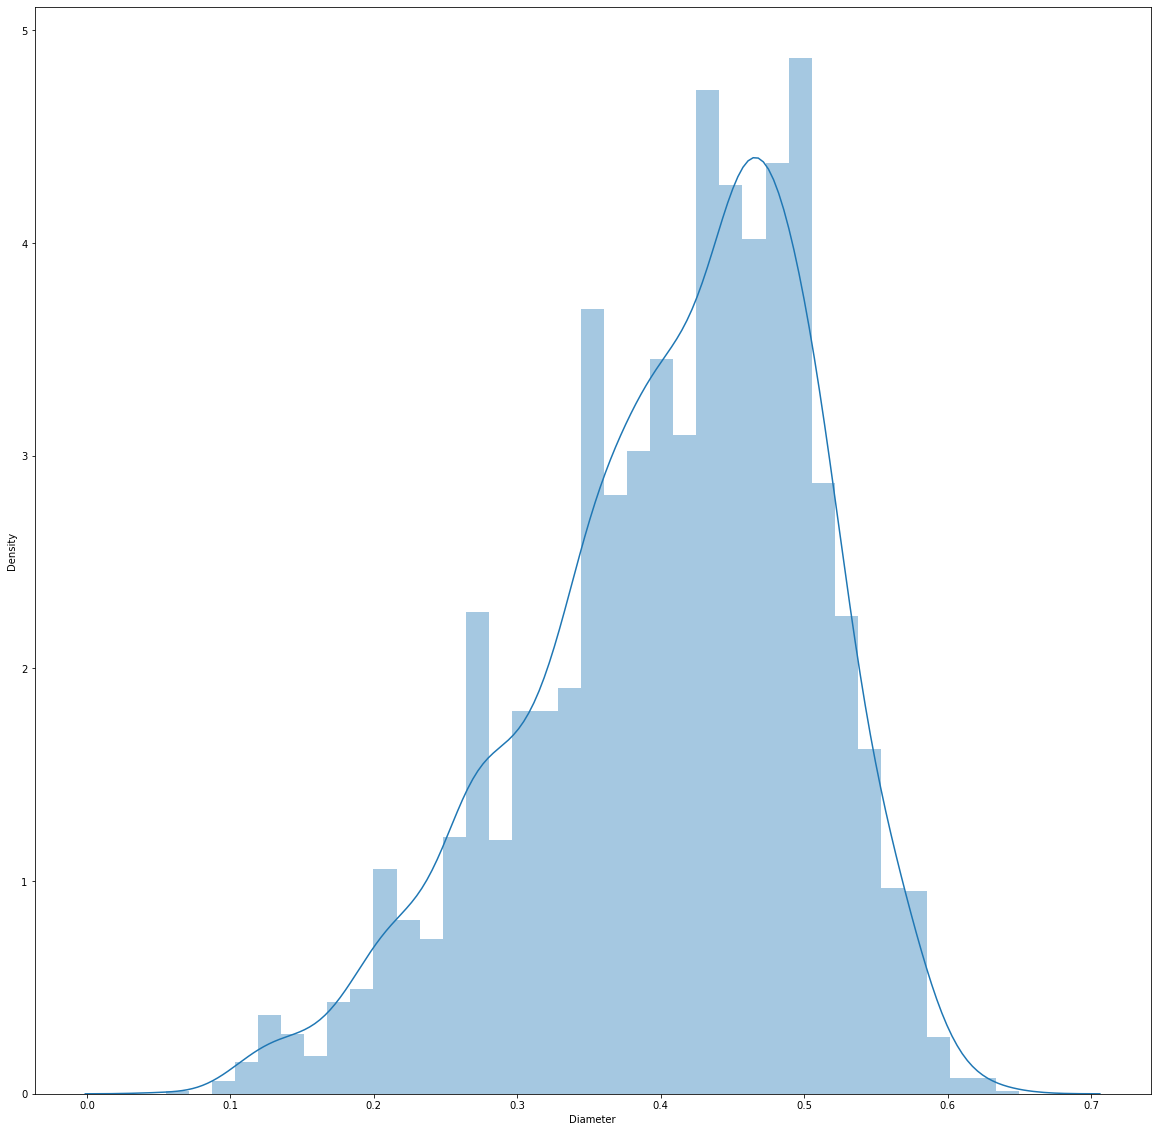

In [45]:
sns.distplot(df['Diameter'])

It is skewed left side,building block is out of the normalized  curve

<AxesSubplot:xlabel='Height', ylabel='Density'>

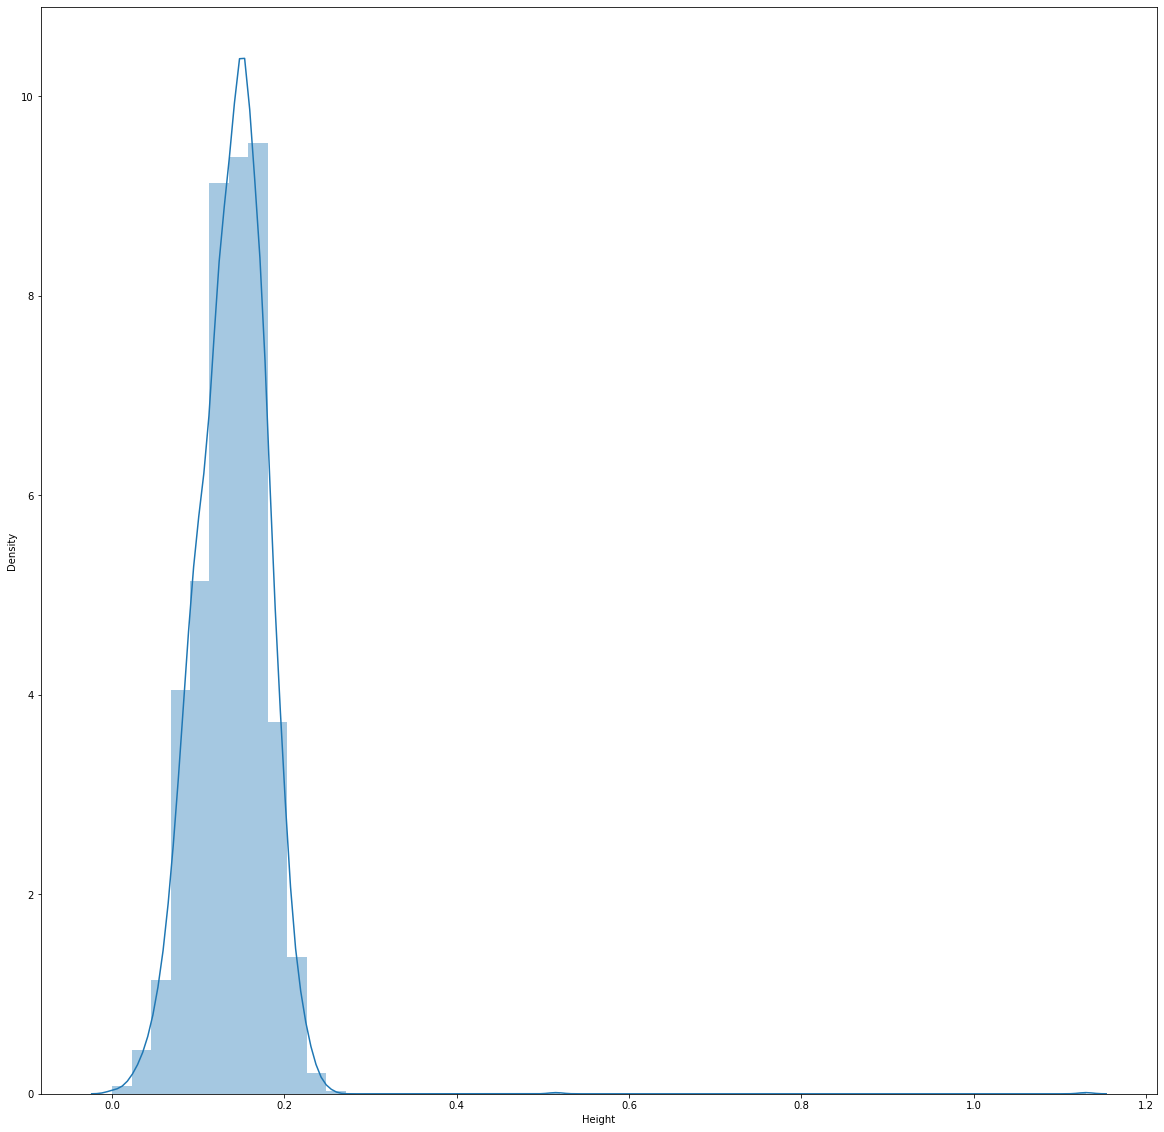

In [46]:
sns.distplot(df['Height'])

It is skewed right side,building block is out of the normalized  curve

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

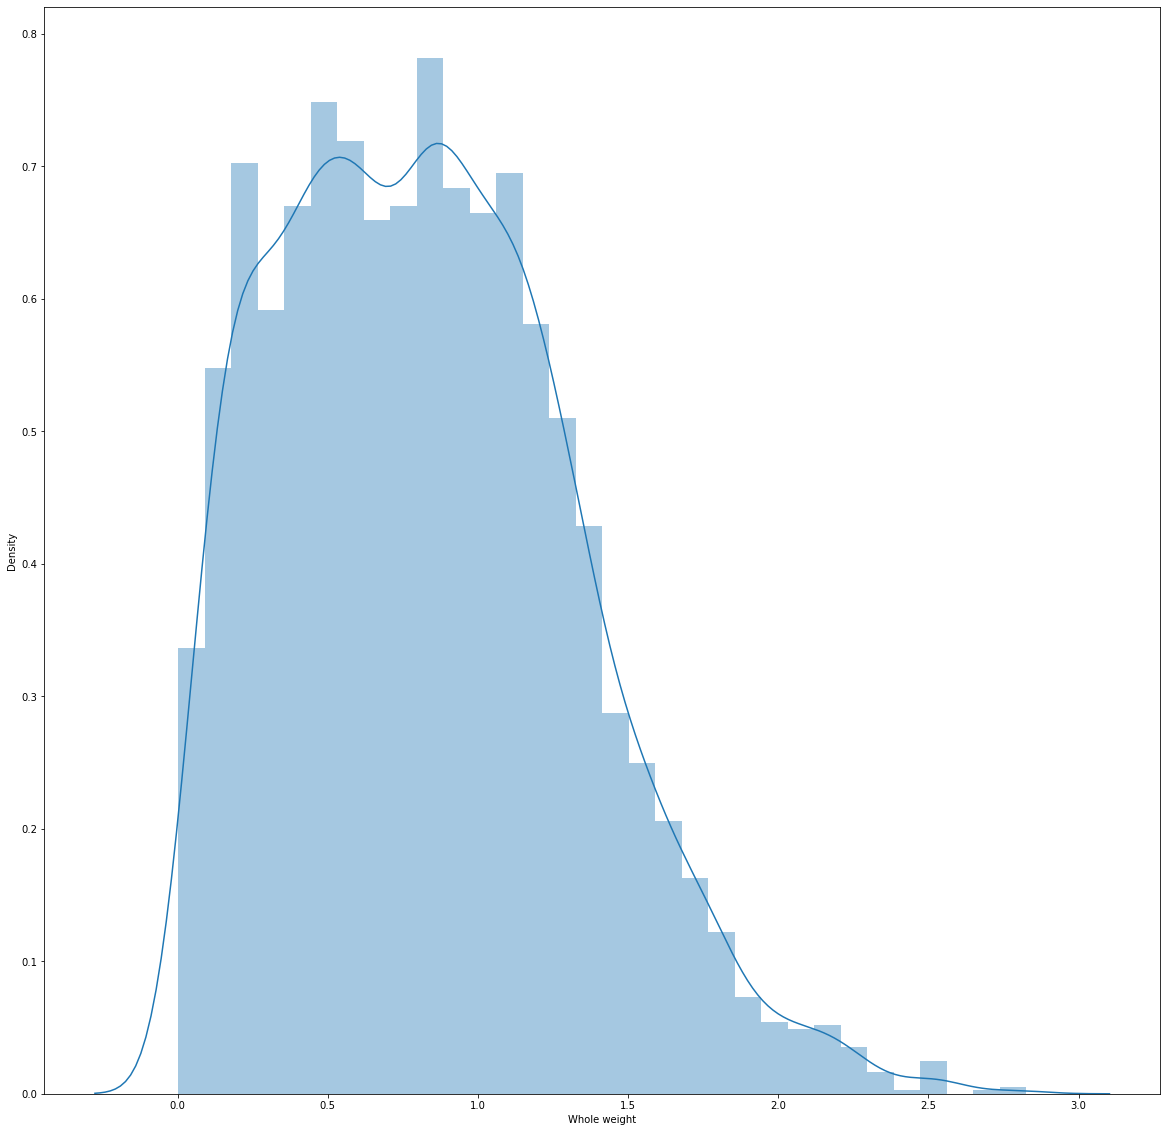

In [47]:
sns.distplot(df['Whole weight'])

It is skewed right side,building block is out of the normalized  curve

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

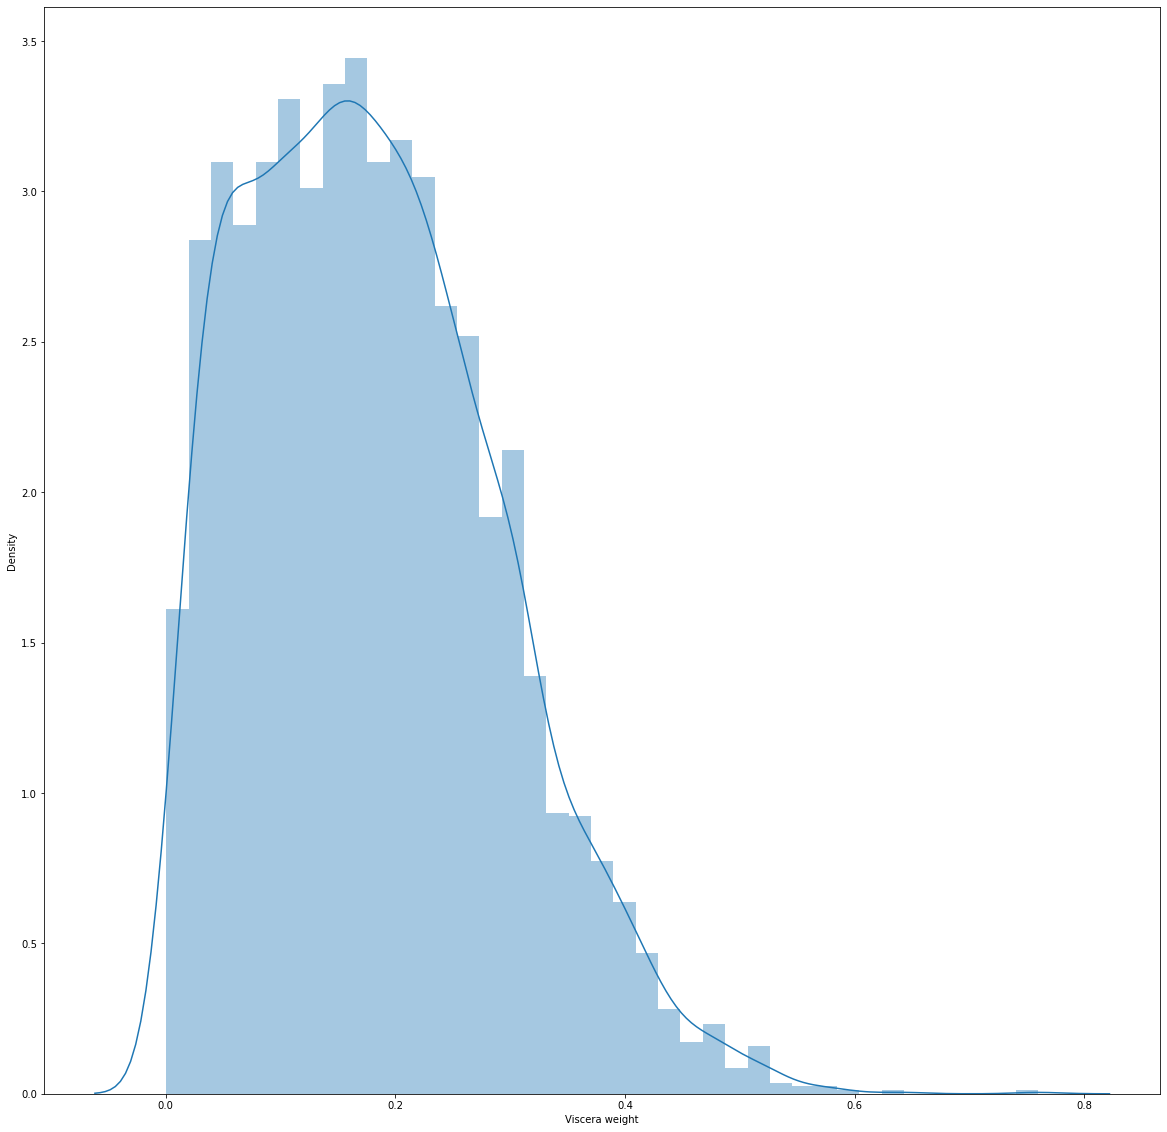

In [48]:
sns.distplot(df['Viscera weight'])

It is skewed right side,building block is out of the normalized  curve

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

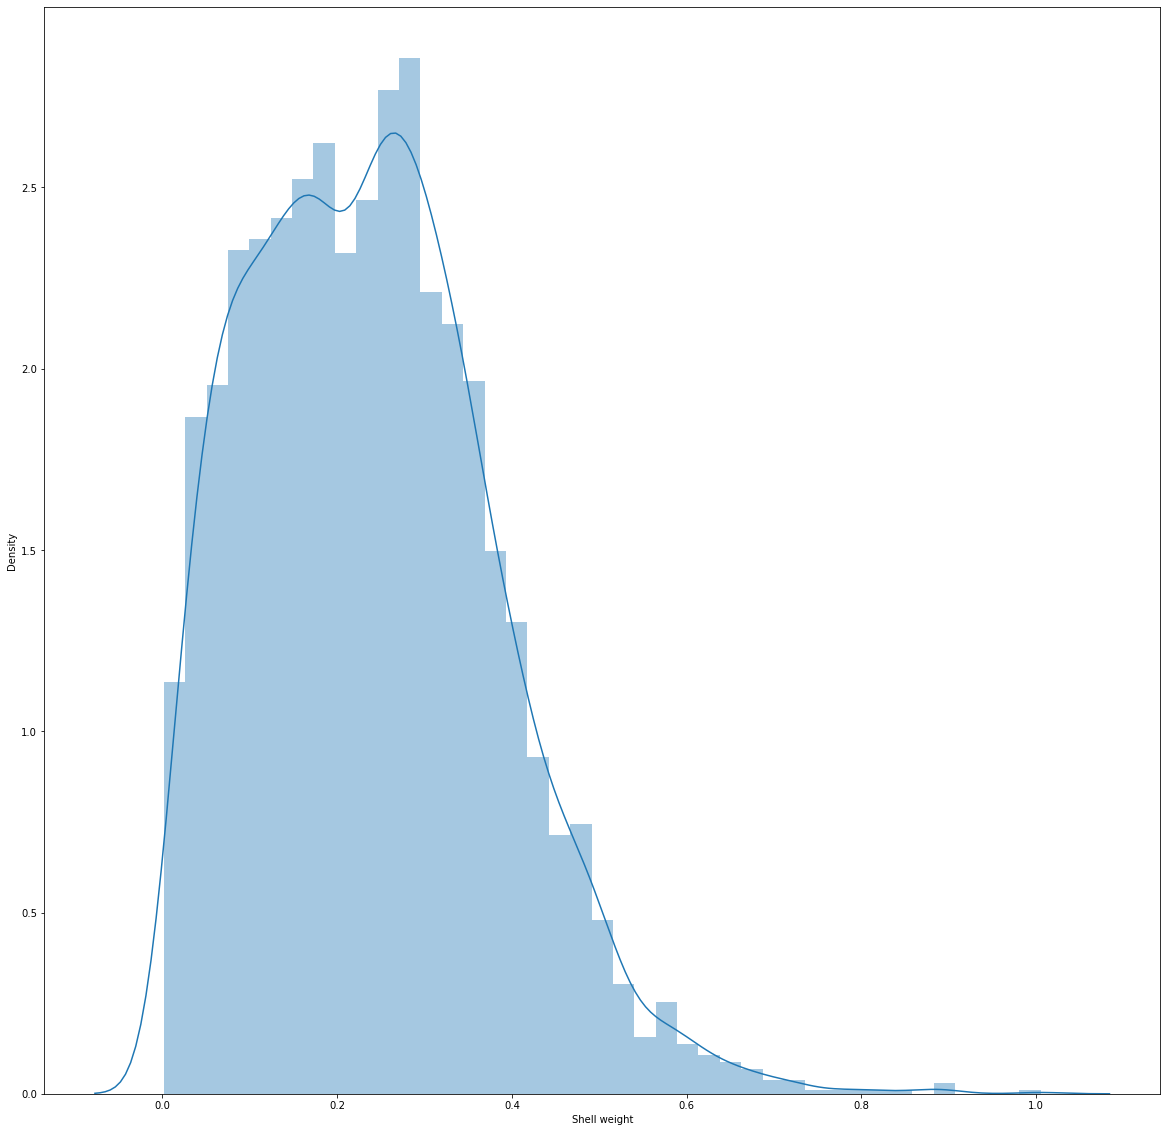

In [49]:
sns.distplot(df['Shell weight'])

It is skewed right side,building block is out of the normalized  curve

## -------------------------------------------------------------------------------------------------

# Removing Outliers

Sex                   AxesSubplot(0.125,0.71587;0.133621x0.16413)
Length             AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Diameter            AxesSubplot(0.44569,0.71587;0.133621x0.16413)
Height             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
Whole weight       AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Shucked weight       AxesSubplot(0.125,0.518913;0.133621x0.16413)
Viscera weight    AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Shell weight       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Rings             AxesSubplot(0.606034,0.518913;0.133621x0.16413)
dtype: object

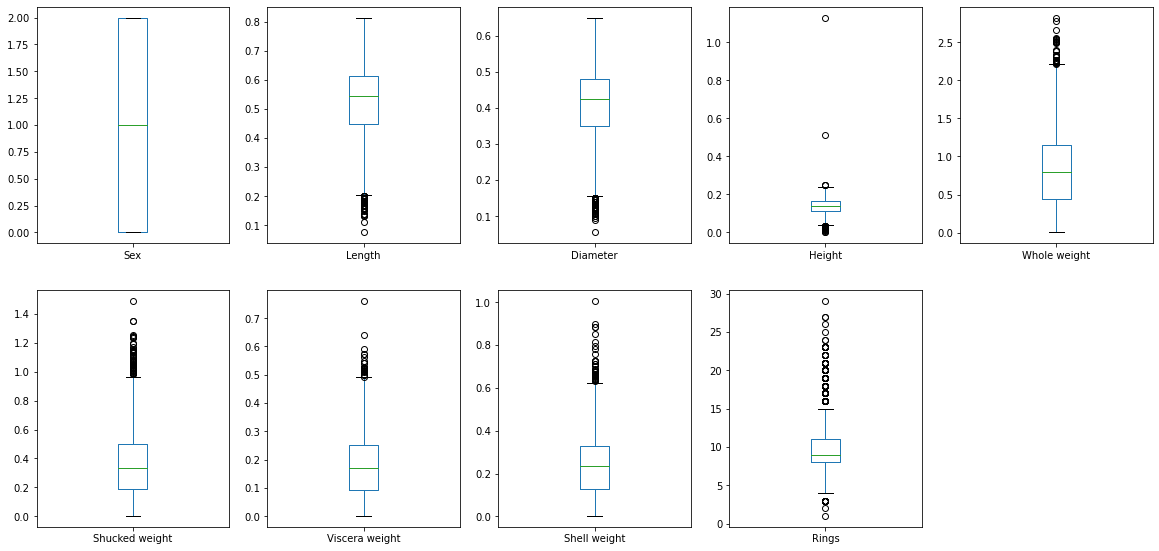

In [50]:
# WE CAN SEE ALL THE PLOT AT ONCE ALSO JUST BY SubPloT

df.plot(kind='box',subplots=True,layout=(4,5))

In [51]:
from scipy.stats import zscore

In [52]:
z=np.abs(zscore(df))
z.shape

(4177, 9)

In [53]:
np.where(z>3)

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
         166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
         238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
         334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
         433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
         674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
         754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
        1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
        1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
        1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
        1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
        2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
        2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
        2436, 2459, 2471, 2544, 2623, 

In [54]:
df_new=df[(z<3).all(axis=1)]

In [55]:
df_new.shape

(4027, 9)

In [56]:
df.shape

(4177, 9)

In [57]:
print ("Old DataFrame =",df.shape)
print ("New DataFrame =",df_new.shape)
print ("Total dropped rows = ",df.shape[0] - df_new.shape[0])

Old DataFrame = (4177, 9)
New DataFrame = (4027, 9)
Total dropped rows =  150


### % data loss

In [58]:
loss_percent=(4177-4027)/4177*100
print (loss_percent,'%')

3.5910940866650707 %


In [59]:
df_new.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [60]:
# Independent column

x=df_new.iloc[:,0:-1]

In [61]:
# Target or dependent variable

y=df_new.iloc[:,-1]

# Now before removing skewness ,lets remove multicollinearity

In [62]:
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
# Now apply VIF

def calc_vif(x):
    vif=pd.DataFrame() 
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return (vif)

In [64]:
calc_vif(x)

,variables,VIF FACTOR
0,Sex,2.586539
1,Length,711.017756
2,Diameter,762.862946
3,Height,92.050181
4,Whole weight,441.600560
5,Shucked weight,108.511496
6,Viscera weight,65.669278
7,Shell weight,94.849108


In [65]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [66]:
# Lets drop Diameter because it has highest Vif factor

x=x.drop(['Diameter'],axis=1)

In [67]:
x

,Sex,Length,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0,0.565,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.150,1.0945,0.5310,0.2610,0.2960


# TRANSFORMING DATA TO REMOVE SKEWNESS

In [68]:
from sklearn.preprocessing import power_transform

In [69]:
x=power_transform(x,method='yeo-johnson')

In [70]:
x

array([[ 1.13432919, -0.68445079, -1.15893308, ..., -0.54086524,
        -0.68803217, -0.58635376],
       [ 1.13432919, -1.4117394 , -1.28040611, ..., -1.31131805,
        -1.33285416, -1.33271691],
       [-1.31306782, -0.0462191 , -0.12830502, ..., -0.36270513,
        -0.24037305, -0.08021413],
       ...,
       [ 1.13432919,  0.65112915,  1.94363286, ...,  0.90189694,
         1.08965131,  0.66363183],
       [-1.31306782,  0.92606411,  0.28606972, ...,  0.92415296,
         0.87642835,  0.57752029],
       [ 1.13432919,  1.9719402 ,  1.62558351, ...,  2.31446634,
         1.73214622,  1.85675543]])

In [71]:

from sklearn.preprocessing import StandardScaler
#transforming my dataset into a standard normal distribution

sc=StandardScaler()

x=sc.fit_transform(x)
x

array([[ 1.13432919, -0.68445079, -1.15893308, ..., -0.54086524,
        -0.68803217, -0.58635376],
       [ 1.13432919, -1.4117394 , -1.28040611, ..., -1.31131805,
        -1.33285416, -1.33271691],
       [-1.31306782, -0.0462191 , -0.12830502, ..., -0.36270513,
        -0.24037305, -0.08021413],
       ...,
       [ 1.13432919,  0.65112915,  1.94363286, ...,  0.90189694,
         1.08965131,  0.66363183],
       [-1.31306782,  0.92606411,  0.28606972, ...,  0.92415296,
         0.87642835,  0.57752029],
       [ 1.13432919,  1.9719402 ,  1.62558351, ...,  2.31446634,
         1.73214622,  1.85675543]])

In [72]:
x.mean()

7.05778729337075e-18

In [73]:
x.std()

1.0

# -----------------------------------------------------------------------------

## Training the moel with linear regression

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [75]:
lr=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 0.5176872960774888
At random state 0,the testing accuracy is :- 0.4836973330271437



At random state 1,the training accuracy is :- 0.516119141660107
At random state 1,the testing accuracy is :- 0.48815179674864206



At random state 2,the training accuracy is :- 0.5121861336500154
At random state 2,the testing accuracy is :- 0.5073373286187588



At random state 3,the training accuracy is :- 0.5122912445436546
At random state 3,the testing accuracy is :- 0.5061094092346679



At random state 4,the training accuracy is :- 0.5096624766461035
At random state 4,the testing accuracy is :- 0.5169026909245702



At random state 5,the training accuracy is :- 0.5158651529076502
At random state 5,the testing accuracy is :- 0.4921179104291473



At random state 6,the training accuracy is :- 0.5096543716942533
At random state 6,the testing accuracy is :- 0.5162135892829646



At random state 7,the training accuracy is :- 0.5205836782349031
At random s

At random state 81,the training accuracy is :- 0.5083944081046081
At random state 81,the testing accuracy is :- 0.5219018432500739



At random state 82,the training accuracy is :- 0.49746978009613585
At random state 82,the testing accuracy is :- 0.5595221539374344



At random state 83,the training accuracy is :- 0.5150380951949691
At random state 83,the testing accuracy is :- 0.4967494514508449



At random state 84,the training accuracy is :- 0.5154252896767663
At random state 84,the testing accuracy is :- 0.49383332917958045



At random state 85,the training accuracy is :- 0.5149099162003358
At random state 85,the testing accuracy is :- 0.4950144035167888



At random state 86,the training accuracy is :- 0.5068391379260568
At random state 86,the testing accuracy is :- 0.5305212341357222



At random state 87,the training accuracy is :- 0.513342208045238
At random state 87,the testing accuracy is :- 0.5026190513666801



At random state 88,the training accuracy is :- 0.512015569375

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=34)

In [83]:
lr.fit(x_train,y_train)

LinearRegression()

In [84]:
pred_test=lr.predict(x_test)

In [85]:
print (r2_score(y_test,pred_test))

0.5117841706781652


In [86]:
print (' **ERROR** ')

print ('Mean Absolute Error :->',mean_absolute_error(y_test,pred_test))
print ('Mean Squared Error :->',mean_squared_error(y_test,pred_test))

print ('Root Mean Squared Error :->',np.sqrt(mean_squared_error(y_test,pred_test)))

 **ERROR** 
Mean Absolute Error :-> 1.5205554165121864
Mean Squared Error :-> 4.048255060767768
Root Mean Squared Error :-> 2.0120275994050796


# CROSS VALIDATION OF THE MODEL

In [87]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print (f"At cross fold {i} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for testing is {Test_accuracy}")
    print ("\n\n")

At cross fold 2 the cv score is 0.5080402046031052 and accuracy score for training is -0.5006212292730092 and accuracy for testing is 0.5117841706781652



At cross fold 3 the cv score is 0.49610121506719745 and accuracy score for training is -0.5006212292730092 and accuracy for testing is 0.5117841706781652



At cross fold 4 the cv score is 0.43151340884874045 and accuracy score for training is -0.5006212292730092 and accuracy for testing is 0.5117841706781652



At cross fold 5 the cv score is 0.42311554877170304 and accuracy score for training is -0.5006212292730092 and accuracy for testing is 0.5117841706781652



At cross fold 6 the cv score is 0.4329869394688577 and accuracy score for training is -0.5006212292730092 and accuracy for testing is 0.5117841706781652



At cross fold 7 the cv score is 0.4435537121673366 and accuracy score for training is -0.5006212292730092 and accuracy for testing is 0.5117841706781652



At cross fold 8 the cv score is 0.4092906231296239 and accura

**We will go with cross validation 2 bcz it is closer to r2 score**

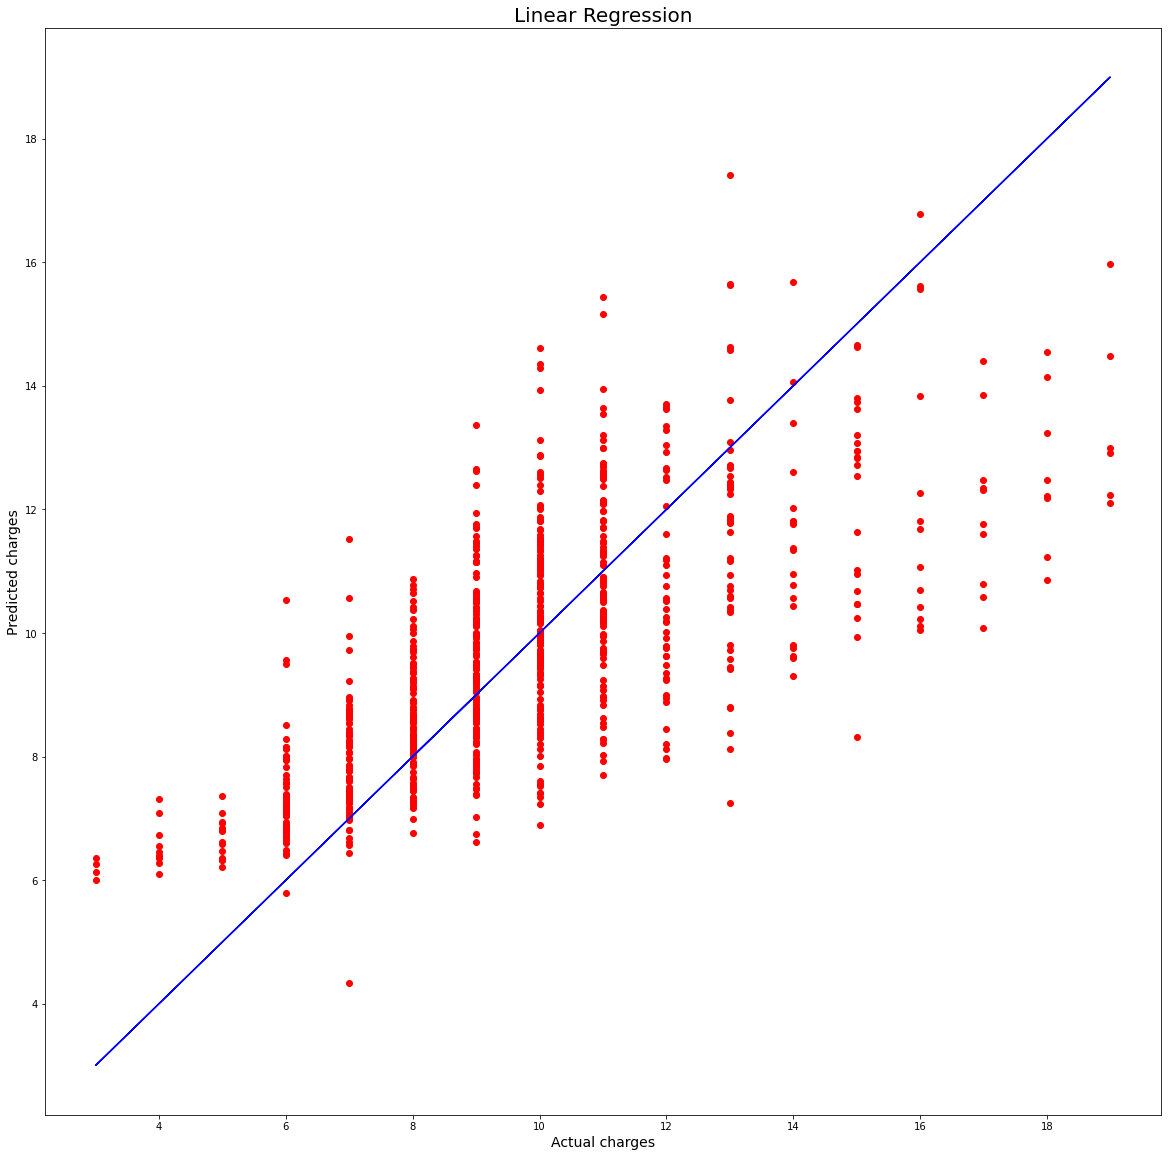

In [88]:
import matplotlib.pyplot as plt
plt.scatter (x=y_test,y=pred_test,color='r')

plt.plot(y_test,y_test,color='b')

plt.xlabel('Actual charges' ,fontsize=14)

plt.ylabel('Predicted charges', fontsize=14)
plt.title('Linear Regression' , fontsize=20)
plt. show()

**We can see that 50% of the data are falling of Best Fit file line And Linear Regression is not peforming well**

## NOW LETS USE DIFFERENT REGRESSOR MODEL AND PREDICT THE BEST SCORE

In [89]:
def model_selection(algorithm_instance,x_train,y_train,x_test,y_test):
    algorithm_instance.fit(x_train,y_train)
    model_1_pred_train=algorithm_instance.predict(x_train)
    model_1_pred_test=algorithm_instance.predict(x_test)
    print ('r2_score of training model :-',r2_score(y_train,model_1_pred_train))
    print ('r2_score of test data :-',r2_score(y_test,model_1_pred_test))

In [90]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [91]:
model_selection(lr,x_train,y_train,x_test,y_test)

r2_score of training model :- 0.5110541914952604
r2_score of test data :- 0.5117841706781652


In [92]:
svr=SVR()
model_selection(svr,x_train,y_train,x_test,y_test)

r2_score of training model :- 0.5503931238297501
r2_score of test data :- 0.5424047858121364


In [93]:
dtr=DecisionTreeRegressor()
model_selection(dtr,x_train,y_train,x_test,y_test)

r2_score of training model :- 1.0
r2_score of test data :- 0.11031995041157538


In [94]:
rf=RandomForestRegressor()
model_selection(rf,x_train,y_train,x_test,y_test)

r2_score of training model :- 0.9336947244028224
r2_score of test data :- 0.5319286575315203


In [95]:
kn=KNeighborsRegressor()
model_selection(kn,x_train,y_train,x_test,y_test)

r2_score of training model :- 0.6542978692285688
r2_score of test data :- 0.48220800665931396


**Out of all the regressor model i find random forest regressor  is performing well than all the model ..Now lets train it andom forest regressor model**

In [96]:
rf=RandomForestRegressor()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 0.9362539311582194
At random state 0,the testing accuracy is :- 0.4996950283063428



At random state 1,the training accuracy is :- 0.9353649617485608
At random state 1,the testing accuracy is :- 0.5039086815650476



At random state 2,the training accuracy is :- 0.935952508742149
At random state 2,the testing accuracy is :- 0.5379045009632515



At random state 3,the training accuracy is :- 0.9364732693507641
At random state 3,the testing accuracy is :- 0.4982566408177652



At random state 4,the training accuracy is :- 0.9338375706051008
At random state 4,the testing accuracy is :- 0.5656654334330924



At random state 5,the training accuracy is :- 0.9358956507118632
At random state 5,the testing accuracy is :- 0.5168946608341585



At random state 6,the training accuracy is :- 0.9328316359660059
At random state 6,the testing accuracy is :- 0.5578411148946809



At random state 7,the training accuracy is :- 0.9367432926979903
At random st

At random state 62,the training accuracy is :- 0.9332957651156448
At random state 62,the testing accuracy is :- 0.5604545098400069



At random state 63,the training accuracy is :- 0.9353611128777087
At random state 63,the testing accuracy is :- 0.5170317253875742



At random state 64,the training accuracy is :- 0.9353025655794214
At random state 64,the testing accuracy is :- 0.526288970389101



At random state 65,the training accuracy is :- 0.9338053462956812
At random state 65,the testing accuracy is :- 0.5537853356177622



At random state 66,the training accuracy is :- 0.93636726098786
At random state 66,the testing accuracy is :- 0.5176467795419051



At random state 67,the training accuracy is :- 0.9357649587238832
At random state 67,the testing accuracy is :- 0.5148719213965489



At random state 68,the training accuracy is :- 0.9364049989237652
At random state 68,the testing accuracy is :- 0.513378647815133



At random state 69,the training accuracy is :- 0.9351193063784135


In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=82)

In [101]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [103]:
pred_test=rf.predict(x_test)

In [104]:
print (r2_score(y_test,pred_test))

0.589353785357589


In [105]:
print (' **ERROR** ')

print ('Mean Absolute Error :->',mean_absolute_error(y_test,pred_test))
print ('Mean Squared Error :->',mean_squared_error(y_test,pred_test))

print ('Root Mean Squared Error :->',np.sqrt(mean_squared_error(y_test,pred_test)))

 **ERROR** 
Mean Absolute Error :-> 1.4133374689826304
Mean Squared Error :-> 3.551880272952854
Root Mean Squared Error :-> 1.8846432747214668


# -----------------------------------

In [106]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for i in range(2,10):
    cv_score=cross_val_score(rf,x,y,cv=i)
    cv_mean=cv_score.mean()
    print (f"At cross fold {i} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for testing is {Test_accuracy}")
    print ("\n\n")

At cross fold 2 the cv score is 0.5230924066231307 and accuracy score for training is -0.7373192722739501 and accuracy for testing is 0.589353785357589



At cross fold 3 the cv score is 0.514519347117766 and accuracy score for training is -0.7373192722739501 and accuracy for testing is 0.589353785357589



At cross fold 4 the cv score is 0.4479638496541347 and accuracy score for training is -0.7373192722739501 and accuracy for testing is 0.589353785357589



At cross fold 5 the cv score is 0.4539271568215085 and accuracy score for training is -0.7373192722739501 and accuracy for testing is 0.589353785357589



At cross fold 6 the cv score is 0.4575539378945173 and accuracy score for training is -0.7373192722739501 and accuracy for testing is 0.589353785357589



At cross fold 7 the cv score is 0.47556005579055355 and accuracy score for training is -0.7373192722739501 and accuracy for testing is 0.589353785357589



At cross fold 8 the cv score is 0.4371895372932288 and accuracy score 

**We will choose cv=2 bcz its near to r2_score**

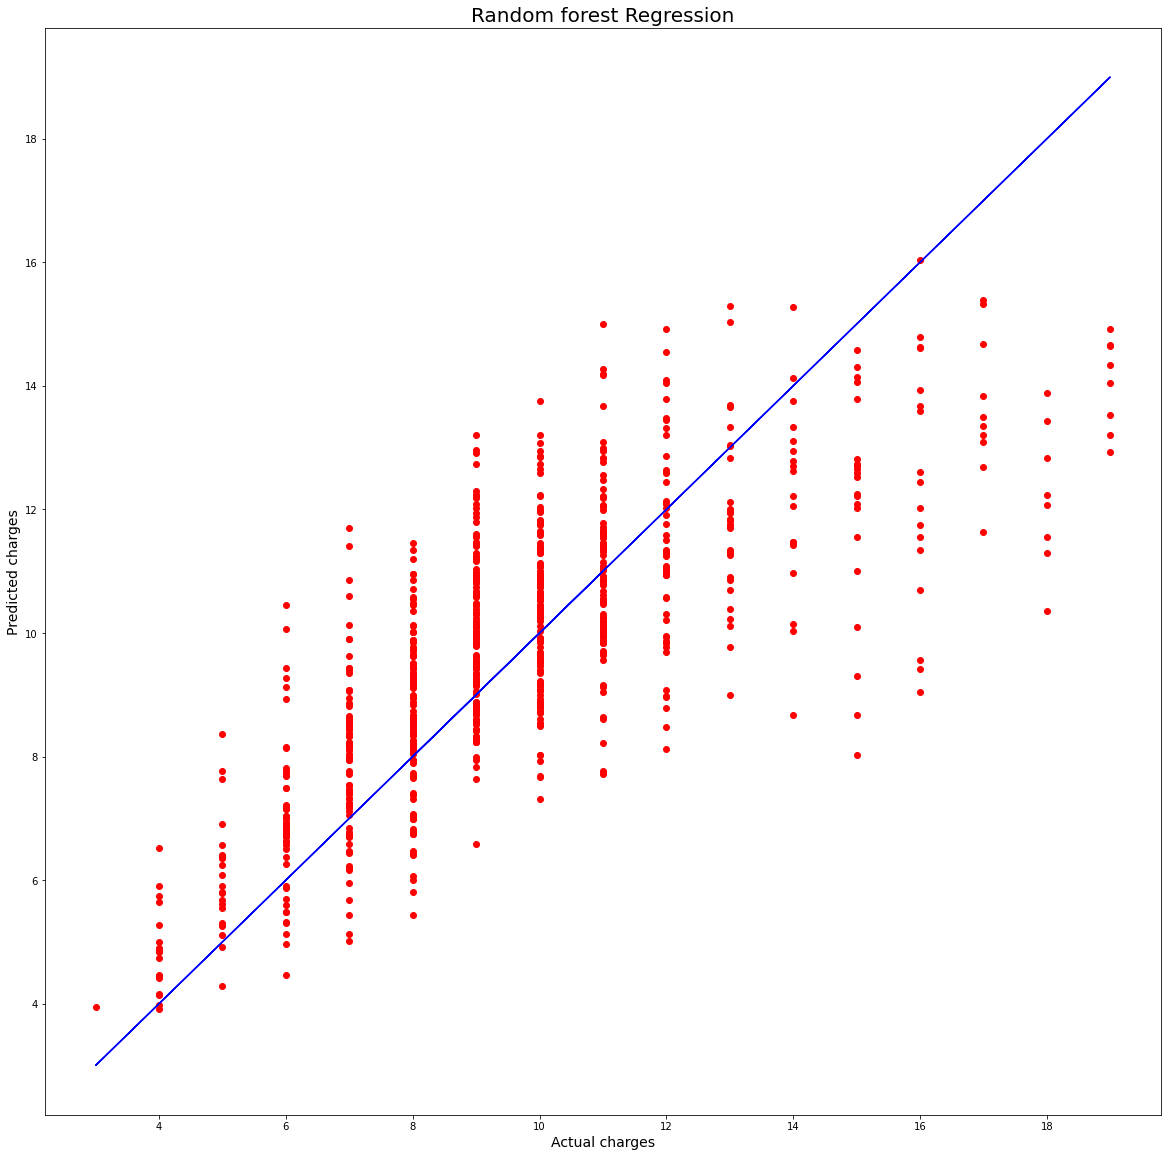

In [107]:
import matplotlib.pyplot as plt
plt.scatter (x=y_test,y=pred_test,color='r')

plt.plot(y_test,y_test,color='b')

plt.xlabel('Actual charges' ,fontsize=14)

plt.ylabel('Predicted charges', fontsize=14)
plt.title('Random forest Regression' , fontsize=20)
plt. show()

**Here we can see maximum of the data's around 70% is falling on best fit line ,and performing better than Linear Regression**

# Regularization

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [109]:
from sklearn.linear_model import Lasso
parameter={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}

ls= Lasso()
clf=GridSearchCV(ls,parameter)
clf.fit(x_train,y_train)

print (clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [110]:
# Final model training
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y_train)
ls_score_training = ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

49.74353551745621

In [111]:
pred_ls=ls.predict(x_test)

In [112]:
lss=r2_score(y_test,pred_ls)
lss*100

55.8539151871873

In [113]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

42.31178249145377

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [115]:
parameter={'criterion' :['mse','mae'],
          'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)

print (clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [116]:
rf=RandomForestRegressor(criterion='mse',max_features='log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision= rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print ('R2 Score :',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print ('Cross Val Score:',rfc*100)

R2 Score : 59.944178831895954
Cross Val Score: 46.91430729054311


### we are getting our model accuracy and cross validation are at 60% and 46% which showes our model is performing  not well .

# save the file

In [117]:
import pickle
filename='abb.pkl'
pickle.dump(rf,open(filename,'wb'))

In [118]:
loaded_model=pickle.load(open('abb.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

59.944178831895954


# ----------------------------------------------------------------------------------------------------------